# Customer Retention Classifier

<hr>

# Imports

In [1]:
import math
import re
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Imputer
from scipy.stats import mode
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
TRAIN_DATA = pd.read_csv("../../../kaggle_data/customer_retention/midterm_train.csv")
TEST_DATA = pd.read_csv("../../../kaggle_data/customer_retention/midterm_test.csv")
X = TRAIN_DATA
X_combined = pd.concat([X, TEST_DATA])

<hr>

# Basic EDA

In [4]:
X_combined.shape

(200000, 51)

In [5]:
X_combined.head()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,0.02%,-4.685655,5.895884,12.235718,-17.658996,-19.322599,1.978951,asia,0.831200,1.980735,Jun,-1.347138,0.320392,-1.177156,-2.704137,-14.103989,-5.655715,5.481989,-1.161496,-3.931582,7.643024,3.421198,3.762529,8.698367,-6.727415,-10.732802,-0.728671,0.018602,-32.680226,-0.106695,3.913680,-5.335641,-3.694592,-1.008670,wednesday,($180.16),1.236134,4.462951,4.592803,-0.034478,3.680401,0.0
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,0.00%,-3.103170,0.982095,3.753298,7.537105,5.942761,0.088104,asia,0.022300,-5.310811,Jun,0.898115,-1.935222,-0.398599,-0.979549,-10.746822,2.507350,1.280838,3.452034,0.624896,0.426659,2.874107,18.712973,7.312360,-15.853969,-1.455398,0.236479,-3.252878,-1.289889,14.377643,6.201034,-8.490805,6.414948,5.831287,tuesday,$432.31,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947,1.0
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-0.01%,-5.424805,7.969230,-16.521783,-10.213318,9.272947,1.128275,asia,0.725844,-10.495085,July,4.546223,2.019324,4.339569,-0.205385,-15.868465,-0.501901,2.002275,0.225154,-0.882617,-14.174509,-14.707616,19.006559,2.732869,-35.200541,-21.825129,0.365506,-5.381501,16.668153,-7.932493,-0.397368,-4.172583,0.371862,-7.025987,wednesday,($119.17),-66.851394,-11.084558,-11.407072,6.395551,3.545332,0.0
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,0.00%,5.624369,9.138195,2.538420,14.740934,10.200809,-2.862860,asia,-0.358076,2.548242,Aug,-1.207699,-1.183008,-11.578898,-2.626346,15.628244,-16.420842,-6.891503,-4.772674,-0.172465,2.928158,-11.267913,-20.615756,5.138457,20.096343,11.691170,0.442023,-0.380077,29.446823,10.975024,1.148454,1.666316,-2.920478,-2.135088,thurday,"($1,309.54)",0.442939,11.808383,12.151957,-2.923916,-1.471336,0.0
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,-0.02%,1.331710,13.616031,2.503163,-21.545901,-31.082999,0.964522,euorpe,-0.340416,-4.412438,May,-0.504193,0.198800,-1.763387,3.767706,-13.312645,-6.421953,-3.401994,-2.892450,-5.740850,7.334497,0.836239,2.748982,7.637753,-15.819318,-7.478481,0.470682,-2.954060,-10.051513,4.656588,-5.186225,-0.757455,-1.769904,-0.532896,wednesday,"($1,103.32)",61.136654,48.077895,49.476758,1.043061,9.927952,1.0


In [6]:
X_combined.tail()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
39995,0.608853,-0.213463,-3.538605,10.957032,5.586005,-0.238700,16.942579,1.459900,-2.747632,-0.01%,-0.070824,-8.495781,0.955410,-1.825368,8.464736,0.988800,asia,-0.121165,-7.987809,Apr,9.212888,0.855352,-0.310800,-3.211206,-6.657321,-3.572848,6.512648,6.255875,1.169474,7.945029,4.270322,-3.441232,11.050103,-2.555568,2.177949,-0.720993,6.142266,-7.251095,-8.217025,-5.909516,2.238280,7.453938,0.426583,wednesday,"$1,856.05",5.799848,6.348686,6.533406,-0.826225,-2.246642,NaN
39996,-15.654468,13.673730,-5.129639,-4.126615,-10.908006,3.049759,-7.636262,-0.937511,3.010333,0.01%,-1.063526,-18.363552,-7.694954,-17.834623,2.206712,-0.689712,asia,0.468877,-5.369584,Jun,6.847495,-1.320568,-10.622569,-1.003877,6.229476,-9.955536,-2.452780,4.456488,5.245537,-5.728256,5.784018,3.770248,0.217968,-7.909124,-4.594561,1.514454,-7.480561,20.857159,-0.637203,2.056832,-4.085614,-2.170613,-4.170406,thurday,$829.09,-41.281520,4.239135,4.362476,3.961428,-8.864676,NaN
39997,17.104347,10.881559,9.257105,9.473590,-14.404764,-0.186695,14.115917,2.043256,1.253264,-0.01%,4.195605,-2.425618,0.964887,6.451952,-14.481932,-2.597947,asia,-0.110613,-2.209304,Jun,-1.940519,-0.554571,7.117766,-3.403012,3.398249,-0.989290,5.630919,-7.483223,7.614804,9.264284,2.023665,1.569632,-0.458895,-10.484415,-1.300305,1.793511,-1.725453,-18.012855,-2.486768,-8.434629,-8.643560,1.052170,12.314406,wednesday,$362.35,28.513354,5.903222,6.074980,-0.224618,5.162458,NaN
39998,10.318173,-8.793841,-2.670998,4.655068,-1.830378,0.466101,-0.249490,-0.559953,-4.106609,0.00%,-1.936299,4.089064,-6.273545,41.568191,-7.947575,-4.105774,asia,-0.411507,0.171065,July,2.525970,0.771538,-6.505248,-1.828420,7.019153,-6.068829,2.766882,-11.287465,-5.464222,2.480790,-4.602856,-5.143262,-3.490922,6.942449,15.399632,-0.397080,-1.116342,-6.659508,11.824928,-2.964359,2.047145,1.215707,-1.343064,wednesday,"$1,157.95",34.455051,-7.569731,-7.789978,0.160228,-2.713194,NaN
39999,-3.755809,6.229565,-1.286820,-19.987559,14.423951,-2.911045,-2.361610,1.967908,9.371211,0.00%,-6.321918,4.901058,-8.610222,-16.281671,-23.917425,-4.701825,euorpe,0.067131,-11.157262,Apr,-4.618511,0.590587,-1.462620,-4.471936,-46.312562,2.128761,-11.880218,3.164557,2.248421,-14.141446,10.531698,11.736836,10.397603,-43.722423,-36.239352,-0.255263,-5.013353,3.317448,1.165515,10.797298,-3.000358,-5.960865,10.022204,wednesday,($345.83),20.461689,59.354827,61.081800,1.347046,-0.767326,NaN


In [7]:
X_combined.describe()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x10,x11,x12,x13,x14,x15,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x45,x46,x47,x48,x49,y
count,199955.000000,199961.000000,199968.000000,199953.000000,199964.000000,199961.000000,199965.000000,199968.000000,199955.000000,199956.000000,199957.000000,199957.000000,199956.000000,199955.000000,199973.000000,199951.000000,199959.000000,199957.000000,199952.000000,199973.000000,199965.000000,199963.000000,199958.000000,199963.000000,199957.000000,199963.000000,199955.000000,199962.000000,199955.000000,199959.000000,199970.000000,199951.000000,199954.000000,199960.000000,199949.000000,199952.000000,199947.000000,199965.000000,199972.000000,199957.000000,199964.000000,199967.000000,199963.000000,199968.000000,199967.000000,160000.000000
mean,1.565235,2.019043,0.004497,2.493273,0.003351,0.104421,0.014748,-0.000682,0.011391,-0.002462,0.009698,0.011928,-4.840947,-0.081032,0.005232,-0.001965,0.016539,-0.012057,-0.006955,0.001465,-0.007525,0.679520,-0.008309,1.481911,0.021713,0.026879,0.005082,0.005840,0.014156,-0.002127,0.623519,1.568972,0.000166,0.001277,-2.160839,-0.018632,0.019697,-0.010195,-0.007881,0.007071,0.892441,0.041561,0.042583,-0.010375,-0.007987,0.400550
std,16.385727,7.457627,6.800585,9.619015,6.285803,2.173690,7.751972,2.416616,9.161441,2.841331,6.957163,9.151548,20.862632,16.124566,5.128913,0.491367,8.267753,4.167318,1.637392,7.542113,4.492370,21.719806,9.391262,5.717195,5.173343,5.863793,9.012463,6.015031,11.474264,7.522088,18.980144,16.713844,0.886985,3.979747,26.513329,8.983309,6.703131,4.972479,5.426605,6.743400,24.006709,17.726981,18.242465,4.471415,3.615196,0.490011
min,-68.981217,-31.258618,-30.654468,-36.350492,-27.575136,-13.677304,-32.781282,-11.615171,-38.961689,-12.052411,-30.273867,-40.025047,-104.237473,-83.342391,-24.453882,-2.523996,-38.106567,-19.594350,-7.617655,-35.006032,-20.952168,-92.750738,-40.219166,-21.606030,-23.008337,-26.225985,-44.892792,-27.350778,-48.796996,-34.130521,-79.446630,-73.474154,-4.171814,-17.574922,-110.605481,-39.316884,-28.139802,-23.265768,-24.602106,-32.319316,-125.492433,-72.694807,-74.809917,-20.696774,-16.991354,0.000000
25%,-9.398758,-2.884242,-4.598744,-4.001572,-4.228451,-1.370610,-5.202730,-1.639600,-6.144928,-1.915681,-4.671731,-6.146342,-18.907551,-11.282904,-3.453172,-0.333321,-5.568560,-2.817904,-1.114391,-5.080651,-3.023900,-13.827175,-6.311876,-2.378454,-3.487525,-3.920167,-6.070741,-4.073222,-7.696025,-5.087663,-12.270092,-9.557933,-0.594442,-2.687913,-20.193275,-6.076416,-4.508290,-3.378067,-3.670268,-4.529229,-14.604611,-12.274292,-12.631522,-3.026798,-2.445864,0.000000
50%,1.865785,2.205135,0.000046,2.610479,-0.002882,0.061461,-0.021072,-0.001341,0.256766,-0.000199,0.031466,-0.015659,-5.010434,-0.868038,0.012581,-0.000942,0.034036,-0.014078,-0.011136,-0.008851,-0.001748,0.115547,-0.020785,1.552375,0.020799,0.014699,0.006862,0.005769,0.321541,-0.030463,0.353415,2.002073,-0.000024,0.012330,-4.210418,0.015769,0.025383,0.001823,-0.007705,0.018208,0.899817,-0.493777,-0.508342,-0.003022,-0.007593,0.000000
75%,12.809270,6.999845,4.609507,9.037185,4.255184,1.555284,5.259901,1.627245,6.268893,1.918320,4.682364,6.203790,9.201270,10.490568,3.463927,0.327183,5.586278,2.800333,1.101801,5.089474,3.029973,14.504394,6.323244,5.371105,3.518017,3.979940,6.098849,4.056464,7.851615,5.070865,13.208009,12.804321,0.599630,2.687677,14.534742,6.038816,4.548056,3.346707,3.651584,4.567184,16.595121,11.932554,12.279494,3.001140,2.427807,1.000000
max,70.882303,39.193550,29.934983,47.313496,28.571894,10.006106,34.460095,10.794778,39.216249,13.644499,31.454944,40.405604,88.087029,83.430363,25.204206,2.058315,38.344442,21.524455,7.965925,33.923253,21.199277,116.491997,41.409791,28.122227,24.931040,26.008763,39.835810,29.001638,49.115816,33.041415,90.461981,72.844096,4.011485,18.562027,116.485098,46.291216,29.862557,23.132292,22.938242,28.980718,136.368013,77.429817,79.682696,19.217507,15.117022,1.00

<hr>

# Plots

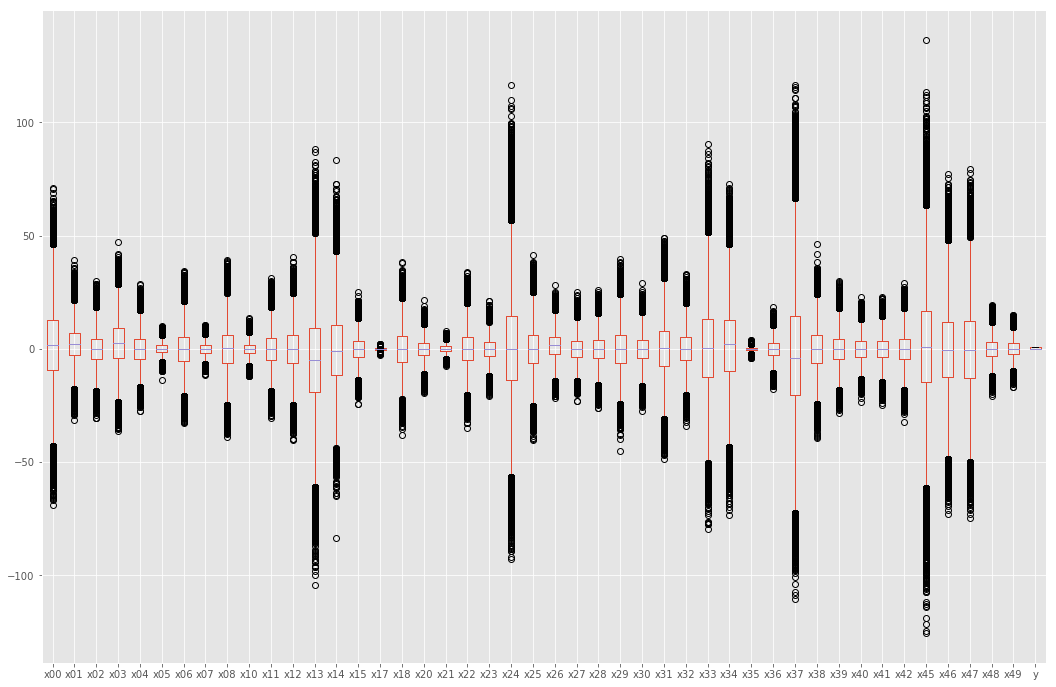

In [10]:
X_combined.plot(kind='box', figsize=(18,12))

<hr>

# Basic Data Cleansing

### Parse Money to Float

In [31]:
def parseMoneyToFloat(x):
    if isinstance(x, str): return float(re.sub('[$,()]', '', x))

X_combined.x44 = [parseMoneyToFloat(x) for x in X_combined.x44]

### Parse Percent to Float

In [32]:
def parsePercentToFloat(x):
    if isinstance(x, str): return float(re.sub('%', '', x)) / 100.00

X_combined.x09 = [parsePercentToFloat(x) for x in X_combined.x09]

### Month

In [33]:
def cleanMonth(x):
    if isinstance(x, str):
        if x == 'Jun': return 'june'
        elif x == 'July': return 'july'
        elif x == 'Aug': return 'august'
        elif x == 'May': return 'may'
        elif x == 'Mar': return 'march'
        elif x == 'Apr': return 'april'
        elif x == 'sept.': return 'september'
        elif x == 'Feb': return 'february'
        elif x == 'Oct': return 'october'
        elif x == 'Nov': return 'november'
        elif x == 'January': return 'january'
        elif x == 'Dev': return 'december'

month = pd.Series([cleanMonth(x) for x in X_combined.x19], name='month')

### Weekday

In [34]:
def cleanWeekday(x):
    if isinstance(x, str):
        if x == 'monday': return 'monday'
        elif x == 'tuesday': return 'tuesday'
        elif x == 'wednesday': return 'wednesday'
        elif x == 'thurday': return 'thursday'
        elif x == 'friday': return 'friday'

weekday = pd.Series([cleanWeekday(x) for x in X_combined.x43], name='weekday')

### Region

In [35]:
def cleanRegion(x):
    if isinstance(x, str):
        if x == 'asia': return 'asia'
        elif x == 'euorpe': return 'europe'
        elif x == 'america': return 'america'

region = pd.Series([cleanRegion(x) for x in X_combined.x16], name='region')

<hr>

# Random Forest Imputation of Missing Values

### Strategy

1. Impute missing categorical data with most frequent value
2. Impute missing numeric data with median (or mean) value
3. For each column run Random Forest to estimate new imputed value while holding other columns constant
4. Run second Random Forest using strategy in 3, but with RF imputed values

### Separate Numeric and Categorical Data

In [46]:
X_numeric = X_combined.copy()
X_numeric.drop(['x16', 'x19', 'x43'], axis=1, inplace=True)

### Impute Missing Categorical Data with Most Frequent Value

In [47]:
month.value_counts()[[0]]

june    55830
Name: month, dtype: int64

In [48]:
weekday.value_counts()[[0]]

wednesday    126447
Name: weekday, dtype: int64

In [49]:
region.value_counts()[[0]]

asia    173176
Name: region, dtype: int64

In [50]:
month.fillna('june', inplace=True)
weekday.fillna('wednesday', inplace=True)
region.fillna('asia', inplace=True)

### Impute Missing Numeric Data with Median
Note to Self: Reconsider median choice after further plotting above

In [51]:
y_numeric = X_numeric.pop('y')

In [52]:
meanImputer = Imputer(strategy='median', copy=False)
meanImputer.fit_transform(X_numeric)

array([[ -5.90070664e+00,   4.69388657e-01,   4.73306785e+00, ...,
          4.59280348e+00,  -3.44776760e-02,   3.68040134e+00],
       [ -3.53039065e+00,   4.22981797e+00,  -4.61943288e+00, ...,
         -5.46246671e+00,  -2.29517509e-01,  -2.33294711e+00],
       [  1.00338855e+00,  -1.25474570e-02,   6.25050323e+00, ...,
         -1.14070719e+01,   6.39555117e+00,   3.54533178e+00],
       ..., 
       [  1.71043472e+01,   1.08815589e+01,   9.25710482e+00, ...,
          6.07498027e+00,  -2.24617902e-01,   5.16245808e+00],
       [  1.03181728e+01,  -8.79384077e+00,  -2.67099784e+00, ...,
         -7.78997798e+00,   1.60228442e-01,  -2.71319396e+00],
       [ -3.75580866e+00,   6.22956464e+00,  -1.28682043e+00, ...,
          6.10818001e+01,   1.34704559e+00,  -7.67326474e-01]])

In [56]:
X_numeric['y'] = y_numeric
X_numeric['month'] = month.copy()
X_numeric['weekday'] = weekday.copy()
X_numeric['region'] = region.copy()
X_iwfam = pd.get_dummies(X_numeric)  # 'iwfam': imputed with frequency and median

### Random Forest Imputation

### Create Test/Train Splits

In [18]:
# df1: Numerical: Mean, Categorical: Most Frequent

# X TEST
X_test_df1 = df1[np.isnan(df1.y)].copy()
X_test_df1.drop('y', axis=1, inplace=True)

# Xy TRAIN
train_df1 = df1.dropna(subset=['y'])

# y TRAIN
y_train_df1 = train_df1['y'].copy()

# X TRAIN
X_train_df1 = train_df1.drop('y', axis=1)

### Random Forest Classifer with K-Fold Cross Validation and Grid Search

In [19]:
# set hyperparameters
n_estimators=[3, 5, 10, 50, 100]
criterion=['gini', 'entropy']
max_features=['auto', 'log2', None]
#min_samples_split=[2, 10, 100]
#min_samples_leaf=[1, 10, 100]
#min_weight_fraction_leaf=[0.0, 0.1, 0.2, 0.5]
#min_impurity_split=[1e-07, 1e-06, 1e-08]
#bootstrap=[True, False]
#oob_score=[False, True]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features)

In [20]:
# get random forest classifier
rfc = RandomForestClassifier(random_state=42, verbose=10, n_jobs=2)

In [21]:
# fit models to training sets

#df1
rfc_estimator_df1 = GridSearchCV(rfc, hyperparameters, scoring='roc_auc', cv=10, verbose=10, n_jobs=2)
rfc_estimator_df1.fit(X_train_df1, y_train_df1)
rfc_best_estimator_df1 = rfc_estimator_df1.best_estimator_
print(rfc_best_estimator_df1)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   10.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   25.5s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   39.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   59.9s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.4min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  9.5min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 12.5min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 12.8min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 14.0min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 18.4min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed: 23.4min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed: 28.3min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed: 66.9min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 106.8min
[Parallel(n_jobs=2)]: D

building tree 1 of 100building tree 2 of 100



[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   16.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   34.8s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.5min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.1min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  3.1min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  4.0min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  5.4min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  6.7min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  8.3min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  9.9min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 11.7min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 13.5min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=2, oob_score=False, random_state=42,
            verbose=10, warm_start=False)


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 14.4min finished


In [22]:
def getMeanAndConfidence(scores, scoring, name):
    mean_score = scores.mean()
    std_dev = scores.std()
    std_error = scores.std() / math.sqrt(scores.shape[0])
    ci =  2.262 * std_error
    lower_bound = mean_score - ci
    upper_bound = mean_score + ci
    print ("%s is %f +/-  %f" % (name, mean_score, ci))
    print ('95 percent probability that if this experiment were repeated over and over the average %s score would be between %f and %f' % (scoring, lower_bound, upper_bound))

In [23]:
# cross validation

#df1
roc_auc_df1 = cross_val_score(rfc_best_estimator_df1, X_train_df1, y_train_df1, cv=10, scoring='roc_auc')
getMeanAndConfidence(roc_auc_df1, 'roc_auc', 'df1')

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.9s


building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   27.9s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.2min


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.7min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.4min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.7min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.7min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  7.1min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  8.3min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.8min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.3min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 12.0min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.2s


building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   27.2s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.1min


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.6min


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.3min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.6min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.6min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  7.0min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  8.3min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.8min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.2min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 11.8min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.3s


building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   26.8s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.1min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.5min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.2min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.4min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.4min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  6.8min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  8.0min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.6min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.0min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 11.7min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100building tree 2 of 100

building tree 3 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   14.2s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   28.6s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.2min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.6min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.4min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.6min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.7min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  7.1min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  8.4min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 10.0min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.5min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 12.2min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   14.1s


building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   28.7s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.3min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.9min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.8min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.5min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.6min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.6min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  6.9min


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  8.1min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.7min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.2min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 11.9min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.6s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   31.7s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.2min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.7min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.7min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.4min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.6min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.7min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  7.1min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  8.3min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.8min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.3min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 12.0min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100building tree 2 of 100



[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   26.3s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.1min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.4min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.1min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.2min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.1min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  6.4min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  7.6min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.2min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 10.7min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 11.3min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100building tree 2 of 100



[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.3s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   27.4s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.1min


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.5min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.3min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.5min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.5min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  6.9min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  8.1min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.8min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.4min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 12.1min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.4s


building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   26.8s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.1min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.5min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.2min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.4min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.4min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  6.8min


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  7.9min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.6min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 11.2min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 11.9min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


building tree 1 of 100building tree 2 of 100

building tree 3 of 100


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.2s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   28.0s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.1min


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.6min


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  2.5min


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  3.2min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.3min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.2min


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  6.5min


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  7.7min


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  9.3min


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 10.7min


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 11.4min finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.1s


df1 is 0.967112 +/-  0.001103
95 percent probability that if this experiment were repeated over and over the average roc_auc score would be between 0.966009 and 0.968214


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [28]:
X_test_df1.head()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x44,x45,x46,x47,x48,x49,month_april,month_august,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,weekday_friday,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday,region_america,region_asia,region_europe
0,13.864410,0.986217,6.835099,12.129012,1.141835,0.257978,6.119007,-0.217401,-0.913796,0.0000,-0.419751,10.172915,-6.886273,-9.130198,-4.578509,7.960524,0.111165,-9.699845,-3.387555,1.911904,0.998081,-0.857490,-7.612868,-4.018814,7.209250,3.013906,-1.446528,-8.230251,-2.442596,-1.144471,-4.253401,-5.203326,2.729897,-1.202386,-2.511575,-13.927587,-14.171462,-2.149515,-11.997662,-3.078159,4.129892,376.12,21.431275,10.409146,10.712008,4.278259,-6.113483,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,17.075344,-8.614119,9.730068,3.645163,18.618751,-1.134351,1.324885,2.750353,-21.323635,-0.0001,1.040758,-8.328905,21.474338,-82.372525,-19.870239,1.919702,0.513677,0.667307,2.426892,4.125267,-3.196495,1.820393,-30.719266,-0.332577,2.166615,-4.156138,-2.056772,1.107974,-7.752646,-26.706473,0.255282,20.459172,-19.764989,-0.103611,4.232745,-49.751647,8.288716,12.060118,0.782677,4.364007,-2.506411,1058.58,31.912299,23.853665,24.547705,1.835443,-0.698576,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,-16.080927,1.490433,7.290475,12.770805,-2.401559,-0.143236,-9.110707,-0.044362,-22.508253,0.0000,-1.905429,17.536177,0.991342,-21.828601,-16.018098,-3.022159,0.229830,4.647811,-5.286930,-3.019935,-0.286837,1.681518,-31.103796,-8.774049,7.590720,-4.232454,8.458921,-7.666138,6.055294,-28.190131,15.473656,15.915722,-9.026852,1.171972,-5.391258,-59.082917,4.775361,1.834801,1.447475,2.394701,-4.988773,388.08,24.751632,9.235573,9.504289,-4.228346,-0.363838,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,8.955804,-2.612907,2.740679,9.704034,-1.524375,-4.001874,3.843455,0.358459,0.900835,-0.0001,-3.305960,11.099784,0.270078,-40.851392,-14.029412,-5.124856,-0.170633,-0.373501,2.284408,-2.855275,11.325377,3.110082,-19.147857,-8.226306,5.767890,6.093670,-7.830001,-6.567701,-3.929450,1.128238,3.463817,14.992986,-9.377136,-0.012398,4.087052,-61.945695,5.142323,12.855278,3.065369,-3.997100,6.548292,272.45,19.673348,-20.449157,-21.044141,-11.225027,9.176861,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,-1.243500,9.752493,-1.931690,1.224566,-18.678339,0.390264,10.615600,3.774666,-10.091425,-0.0001,1.023597,6.415119,-7.197756,-5.616595,10.993535,-2.497816,-0.196972,-12.111033,-0.197022,-1.789174,3.503165,5.784800,21.849473,-12.377823,0.727858,-5.169318,8.545741,1.213110,-9.659291,-12.638857,8.647821,10.183689,4.579249,0.586459,1.920605,13.387445,8.369600,-9.150596,-0.233386,4.280341,-3.315470,127.28,-5.184808,4.179362,4.300964,-1.475613,1.628260,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [29]:
y = rfc_best_estimator_df1.predict(X_test_df1)

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished


In [31]:
y.shape

(40000,)

In [32]:
y_pred = pd.Series(y)

In [34]:
y_pred.shape

(40000,)

In [35]:
y_pred.to_csv(path="../../../kaggle_data/customer_retention/y_predictions_2.csv")

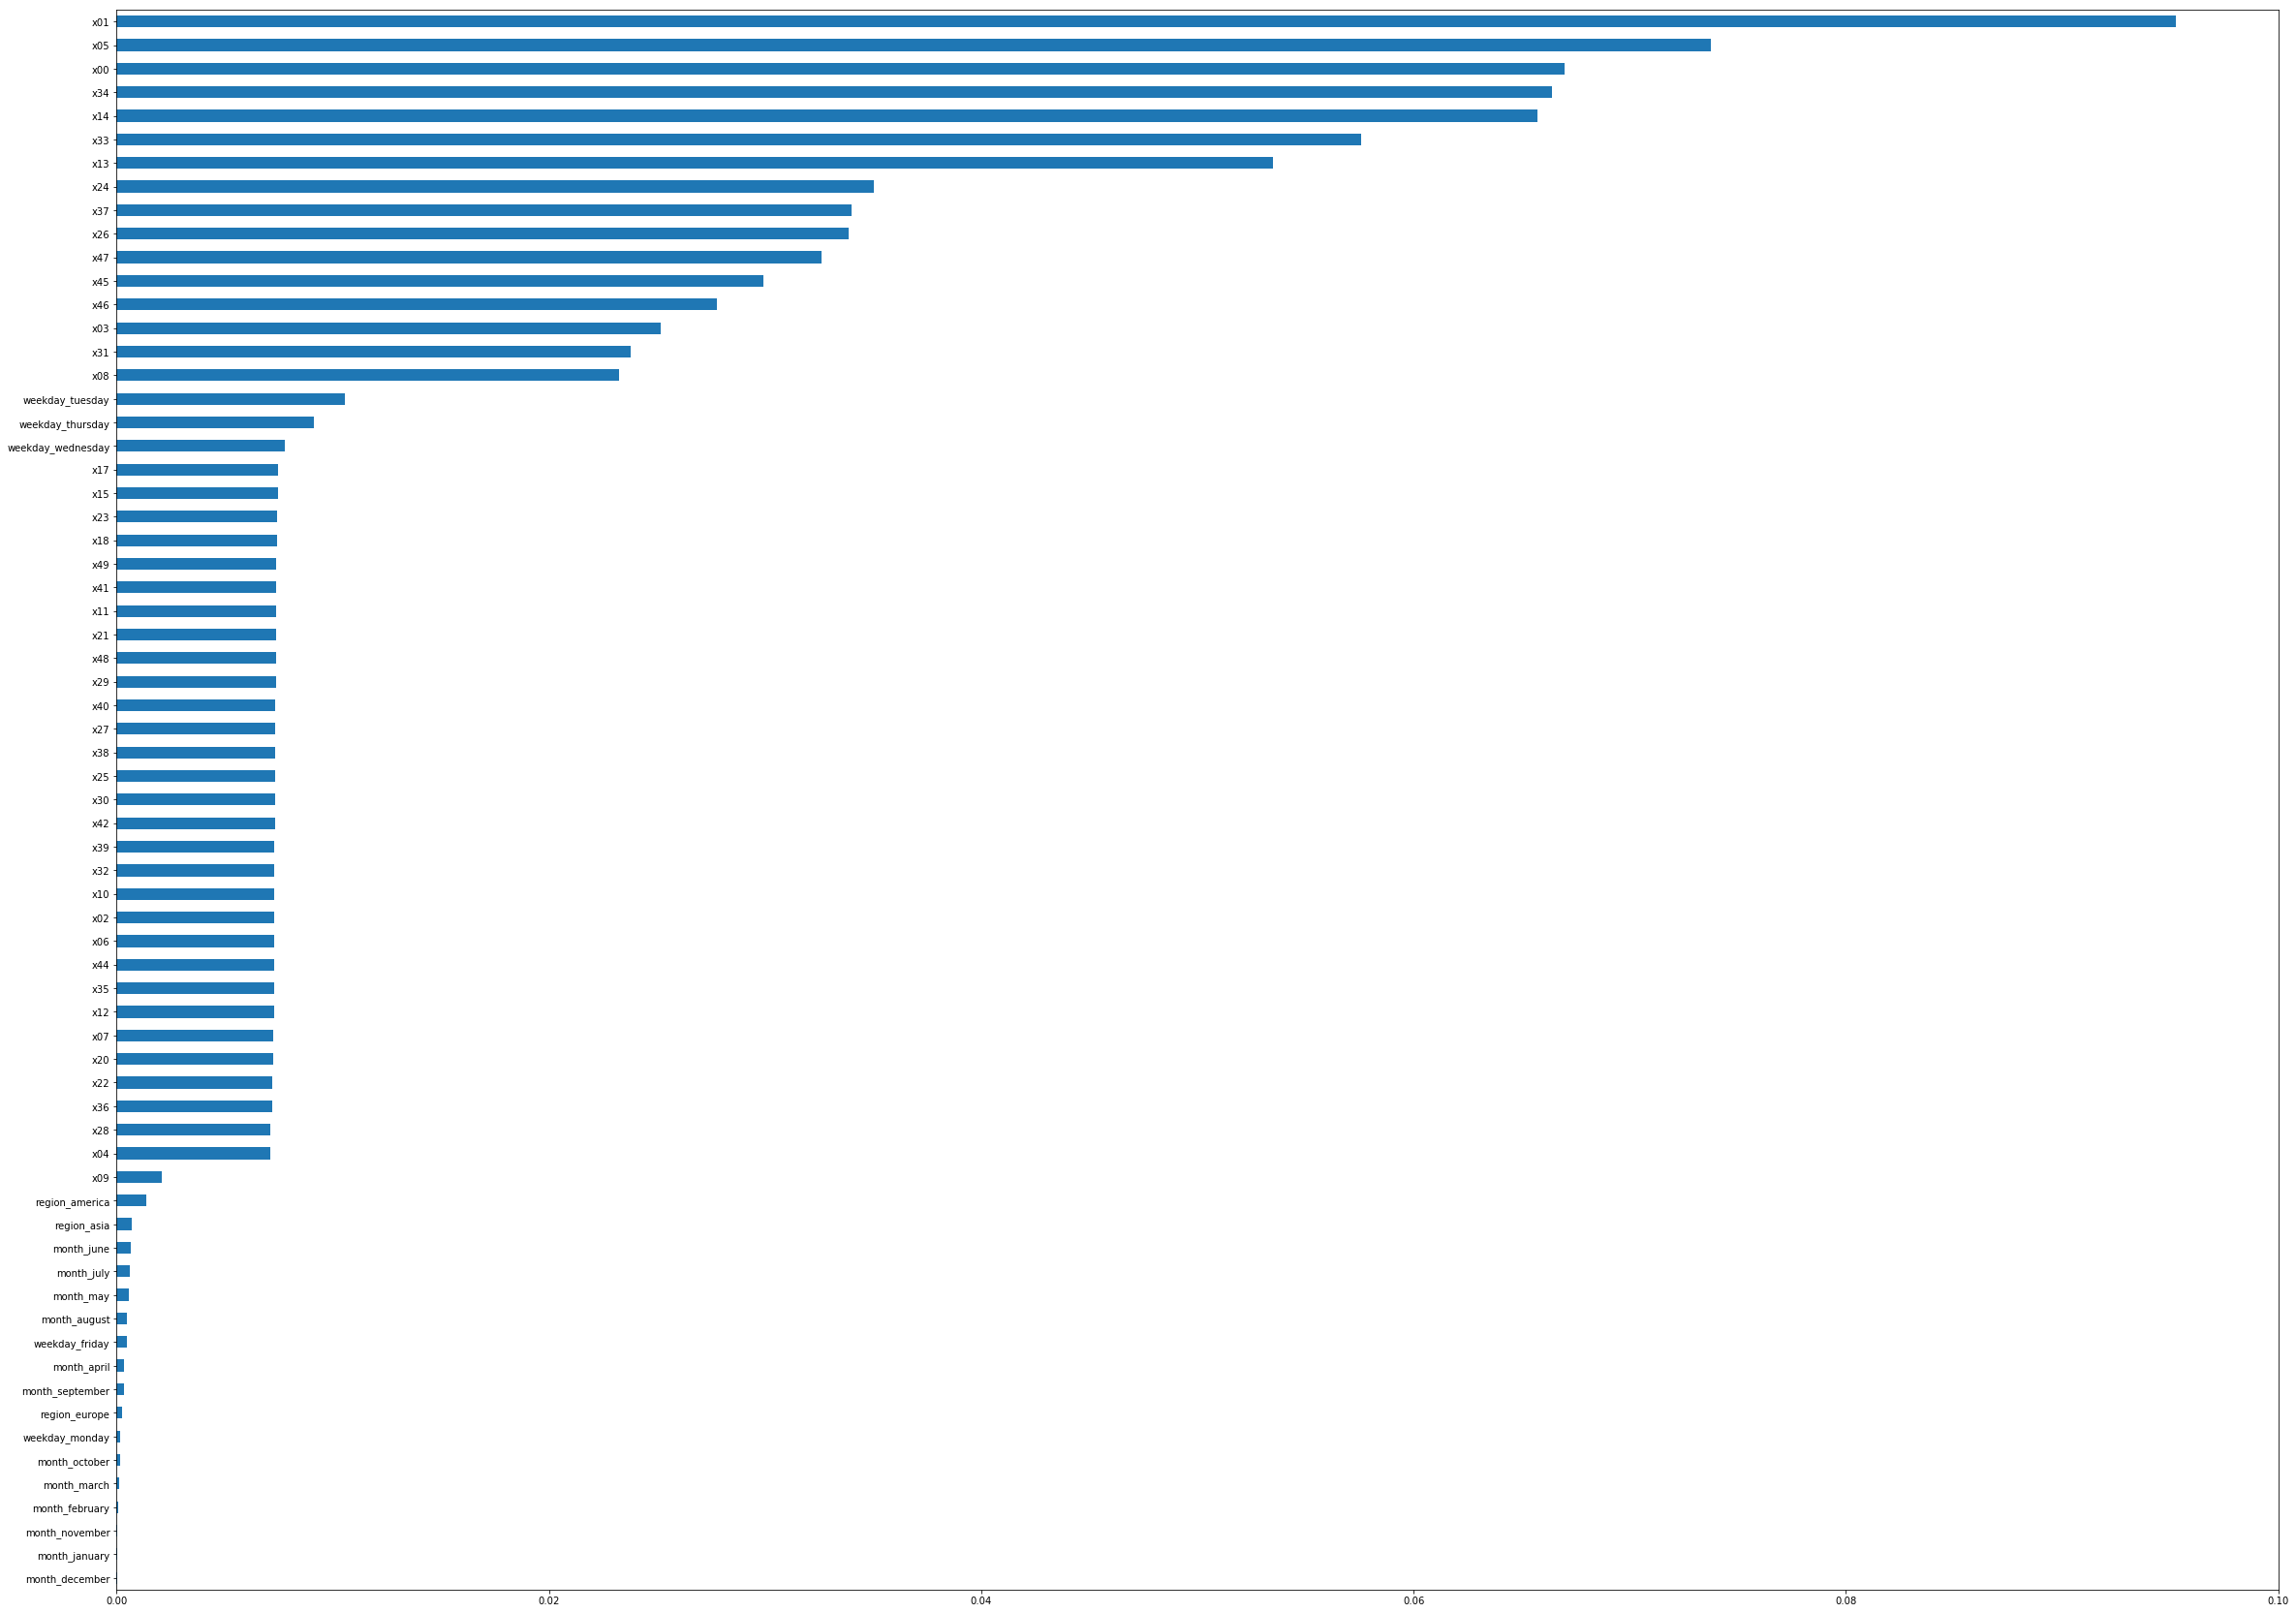

In [71]:
%matplotlib inline
# Simple version that shows all of the variables
feature_importances = pd.Series(rfc_best_estimator_df1.feature_importances_, index=X_train_df1.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(40,30));

In [ ]:
# Most important features
best_features = ['x01', 'x05', 'x00', 'x34', 'x14', 'x33', 'x13', 'x24', 'x37', 'x26', 'x47', 'x45', 'x46', 'x03', 'x31', 'x08', 'y']

In [ ]:
# df1: Numerical: Mean, Categorical: Most Frequent

# X TEST
X_test_df3 = df1[np.isnan(df1.y)].copy()
X_test_df3 = X_test_df3[best_features]
X_test_df3.drop('y', axis=1, inplace=True)

# Xy TRAIN
train_df3 = df1.dropna(subset=['y'])
train_df3 = train_df3[best_features]

# y TRAIN
y_train_df3 = train_df1['y'].copy()

# X TRAIN
X_train_df3 = train_df3.drop('y', axis=1)

In [76]:
# get random forest classifier
rfc_df3 = RandomForestClassifier(random_state=42, verbose=10, n_jobs=-1)

In [77]:
# fit models to training sets

#df3
rfc_estimator_df3 = GridSearchCV(rfc_df3, hyperparameters, scoring='roc_auc', cv=10, verbose=10, n_jobs=-1)
rfc_estimator_df3.fit(X_train_df3, y_train_df3)
rfc_best_estimator_df3 = rfc_estimator_df3.best_estimator_
print(rfc_best_estimator_df3)

ValueError: Found input variables with inconsistent numbers of samples: [160000, 17]

In [ ]:
# cross validation

#df3
roc_auc_df3 = cross_val_score(rfc_best_estimator_df3, X_train_df3, y_train_df3, cv=10, scoring='roc_auc', n_jobs=-1)
getMeanAndConfidence(roc_auc_df3, 'roc_auc', 'df3')

In [ ]:
X_test_df3.head()

In [ ]:
y_df3 = rfc_best_estimator_df3.predict(X_test_df3)

In [ ]:
y_pred_df3 = pd.Series(y_df3)

In [ ]:
#%matplotlib inline
# Simple version that shows all of the variables
feature_importances_df3 = pd.Series(rfc_best_estimator_df3.feature_importances_, index=X_train_df3.columns)
feature_importances_df3.sort_values(inplace=True)
feature_importances_df3.plot(kind="barh", figsize=(40,30));

In [ ]:
y_pred_df3.to_csv(path="../../../kaggle_data/customer_retention/y_predictions_pruned_features.csv")